In [37]:
import numpy as np
import warnings
import nimfa
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import FactorAnalysis

In [3]:
# def fit_DR(X_train, X_test, DR, n_component, seed="315"):
#     """Generalized function to fit a selected dimension reduction method.

#     Args:
#         X_train (torch): tensor of training data
#         X_test (torch): tensor of test data
#         DR (str): "PCA", "NMF", "PPCA" (probabilistic PCA), "PNMF" (probabilistic NMF)
#         n_component (int): number of components to fit
#         seed (str, optional): Random seed. Defaults to "315".
#     """
#     X_train = X_train.numpy()
#     X_test = X_test.numpy()

#     # Fit PCA
#     if DR == "PCA": 
#         dr = PCA(n_components=n_component)
#         dr.fit(X_train)
#         X_train_dr = dr.transform(X_train)
#         X_test_dr = dr.transform(X_test)

#     # Fit NMF
#     elif DR == "NMF": 
#         X_train_min = np.min(X_train)
#         if X_train_min < 0:
#             X_train -= X_train_min

#         X_test_min = np.min(X_test)
#         if X_test_min < 0:
#             X_test -= X_test_min
        
#         warnings.filterwarnings("ignore", category=ConvergenceWarning)
#         dr = NMF(n_components=n_component, random_state=seed)
#         dr = nmf.fit(X_train)
#         X_train_dr = dr.transform(X_train)
#         X_test_dr = dr.transform(X_test)
#         warnings.resetwarnings()

#     # Fit probabilistic PCA
#     elif DR == "PPCA": 
#         ppca = FactorAnalysis(n_components=n_component, random_state=0)
#         ppca.fit(X_train)
#         X_train_dr = dr.transform(X_train)
#         X_test_dr = dr.transform(X_test)

#     # Fit probabilistic NMF
#     elif DR == "PNMF": 
#         pnmf = nimfa.Pmf(X_train, rank=n_component)
#         pnmf_fit = pnmf()
#     #     X_train_dr = pnmf_fit.basis()
#     #     X_test_dr = pnmf_fit.coef()
    
#     # return X_train_dr, X_test_dr

In [86]:
def fit_DR(X_train, X_test, DR, n_component, seed="315"):
    """Generalized function to fit a selected dimension reduction method.

    Args:
        X_train (torch): tensor of training data
        X_test (torch): tensor of test data
        DR (str): "PCA", "NMF", "PPCA" (probabilistic PCA), "PNMF" (probabilistic NMF)
        n_component (int): number of components to fit
        seed (str, optional): Random seed. Defaults to "315".
    """
    X_train = X_train.numpy()
    X_test = X_test.numpy()

    # Fit PCA
    if DR == "PCA": 
        dr = PCA(n_components=n_component)
        dr.fit(X_train)
        # X_train_dr = dr.transform(X_train)
        # X_test_dr = dr.transform(X_test)

    # Fit NMF
    elif DR == "NMF": 
        X_train_min = np.min(X_train)
        if X_train_min < 0:
            X_train -= X_train_min

        X_test_min = np.min(X_test)
        if X_test_min < 0:
            X_test -= X_test_min
        
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        dr = NMF(n_components=n_component, random_state=seed)
        dr = dr.fit(X_train)
        # X_train_dr = dr.transform(X_train)
        # X_test_dr = dr.transform(X_test)
        warnings.resetwarnings()

    # Fit probabilistic PCA
    elif DR == "PPCA": 
        dr = FactorAnalysis(n_components=n_component, random_state=0)
        dr.fit(X_train)
        # X_train_dr = dr.transform(X_train)
        # X_test_dr = dr.transform(X_test)

    # Fit probabilistic NMF
    elif DR == "PNMF": 
        pnmf = nimfa.Pmf(X_train, rank=n_component)
        dr = pnmf()
    #     X_train_dr = pnmf_fit.basis()
    #     X_test_dr = pnmf_fit.coef()
    
    # return X_train_dr, X_test_dr
    return dr

def transform_DR(X_train, X_test, DR, model):
    X_train = X_train.numpy()
    X_test = X_test.numpy()
    
    if DR == "PCA" or DR == "NMF" or DR == "PPCA": 
        if DR == "NMF": 
            X_train_min = np.min(X_train)
            if X_train_min < 0:
                X_train -= X_train_min

            X_test_min = np.min(X_test)
            if X_test_min < 0:
                X_test -= X_test_min

        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        X_train_dr = model.transform(X_train)
        X_test_dr = model.transform(X_test)
        warnings.resetwarnings()
    if DR == "PNMF": 
        X_train_dr = np.array(model.basis())
        X_test_dr = np.array(model.coef())

    return X_train_dr, X_test_dr

In [4]:
# Libraries 
import pandas as pd 
import numpy as np 
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
from preprocess_data import EigenfacesDataset

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA, NMF

import warnings
from sklearn.exceptions import ConvergenceWarning



In [5]:
# Load the different datasets
normalize_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])

eye_state_train_dataset = EigenfacesDataset(
    data_dir='../train_data',
    label='eye_state',
    transform=normalize_transform)
eye_state_train_dataloader = DataLoader(eye_state_train_dataset)

eye_state_test_dataset = EigenfacesDataset(
    data_dir='../test_data',
    label='eye_state',
    transform=normalize_transform)
eye_state_test_dataloader = DataLoader(eye_state_test_dataset)

head_position_train_dataset = EigenfacesDataset(
    data_dir='../train_data',
    label='head_position',
    transform=normalize_transform)
head_position_train_dataloader = DataLoader(head_position_train_dataset)

head_position_test_dataset = EigenfacesDataset(
    data_dir='../test_data',
    label='head_position',
    transform=normalize_transform)
head_position_test_dataloader = DataLoader(head_position_test_dataset)


facial_expression_train_dataset = EigenfacesDataset(
    data_dir='../train_data',
    label='facial_expression',
    transform=normalize_transform)
facial_expression_train_dataloader = DataLoader(facial_expression_train_dataset)

facial_expression_test_dataset = EigenfacesDataset(
    data_dir='../test_data',
    label='facial_expression',
    transform=normalize_transform)
facial_expression_test_dataloader = DataLoader(facial_expression_test_dataset)

In [6]:
# Helper function for grabbing labels 
def grab_labels(dataset): 
    labels = [] 
    for i in range(len(dataset)):
        _, label_idx = dataset[i]
        label = dataset.classes[label_idx]
        labels.append(label)
    return labels

In [7]:
# Helper function for flattening the datasets for model training
def grab_data(dataloader):
    flat_tensors = []
    for tensor_list in dataloader:
        flattened_tensors = torch.flatten(tensor_list[0].squeeze())
        flat_tensors.append(flattened_tensors)
    result_tensor = torch.stack(flat_tensors, dim=0)
    return result_tensor

In [8]:
# Grab the labels for each classification task
eye_X_train = grab_data(eye_state_train_dataloader)
eye_y_train = grab_labels(eye_state_train_dataset)
eye_X_test = grab_data(eye_state_test_dataloader)
eye_y_test = grab_labels(eye_state_test_dataset)

head_X_train = grab_data(head_position_train_dataloader)
head_y_train = grab_labels(head_position_train_dataset)
head_X_test = grab_data(head_position_test_dataloader)
head_y_test = grab_labels(head_position_test_dataset)

facial_X_train = grab_data(facial_expression_train_dataloader)
facial_y_train = grab_labels(facial_expression_train_dataset)
facial_X_test = grab_data(facial_expression_test_dataloader)
facial_y_test = grab_labels(facial_expression_test_dataset)

In [9]:
pca_X_train, pca_X_test = fit_DR(X_train=eye_X_train, X_test=eye_X_test, DR="PCA", n_component=10, seed="315")

In [10]:
pca_X_train.shape

(438, 10)

In [12]:
pca_X_test.shape

(186, 10)

In [11]:
eye_X_train.shape

torch.Size([438, 15360])

In [68]:
def plot_eigenfaces(data, model, DR):
    # Create an NMF object with the desired number of components    
    data = data.numpy()

    # pca = PCA(n_components=10)

    # Fit the PCA model to the data
    model.fit(data)

    # Get the principal components
    components = model.components_

    eigenfaces = components.reshape(-1, 1, 120, 128)

    # Plot the eigenfaces
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(eigenfaces[i, 0], cmap='gray')
        ax.axis('off')
        ax.set_title(f"{DR} Eigenface {i+1}")
    plt.tight_layout()
    plt.show()

In [81]:
# pca_model = fit_DR(X_train=eye_X_train, X_test=eye_X_test, DR="PCA", n_component=10, seed=315)
nmf_model = fit_DR(X_train=eye_X_train, X_test=eye_X_test, DR="NMF", n_component=10, seed=315)

In [38]:
ppca_model = fit_DR(X_train=eye_X_train, X_test=eye_X_test, DR="PPCA", n_component=10, seed=315)

In [40]:
pnmf_model = fit_DR(X_train=eye_X_train, X_test=eye_X_test, DR="PNMF", n_component=10, seed=315)

/Users/jacobchang/miniforge3/envs/default_dev/lib/python3.11/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/Users/jacobchang/miniforge3/envs/default_dev/lib/python3.11/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
/Users/jacobchang/miniforge3/envs/default_dev/lib/python3.11/site-packages/numpy/matrixlib/defmatrix.py:69: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matri

In [25]:
type(pca_model)

sklearn.decomposition._pca.PCA

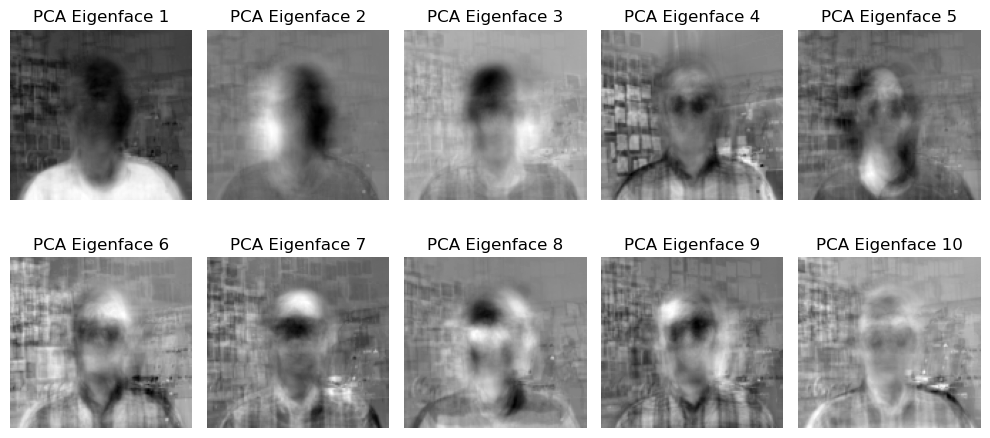

In [69]:
plot_eigenfaces(eye_X_train, pca_model, "PCA")

/Users/jacobchang/miniforge3/envs/default_dev/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


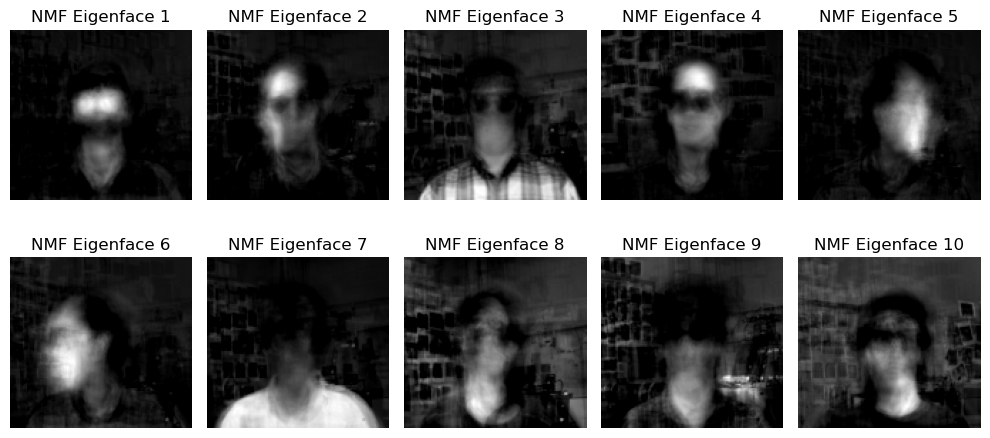

In [70]:
plot_eigenfaces(eye_X_train, nmf_model, "NMF")

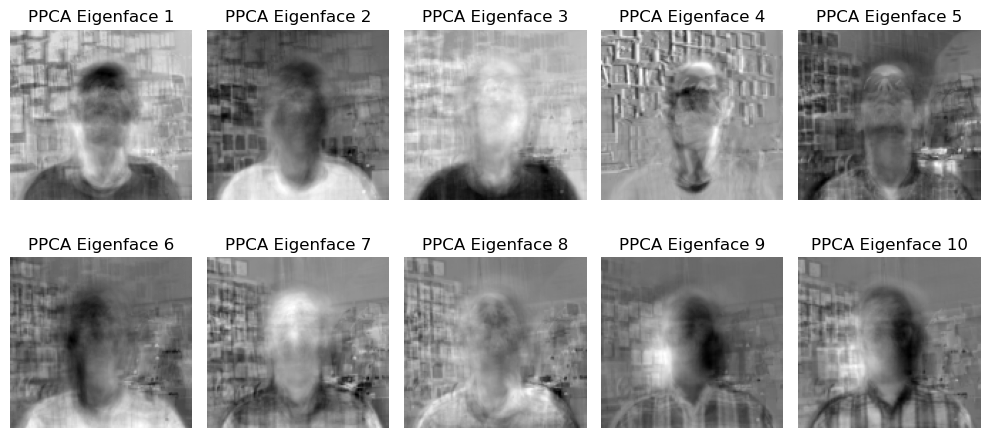

In [71]:
plot_eigenfaces(eye_X_train, ppca_model, "PPCA")

In [42]:
type(pnmf_model)

nimfa.models.mf_fit.Mf_fit

In [41]:
plot_eigenfaces(eye_X_train, pnmf_model)

TypeError: Nmf.__call__() takes 1 positional argument but 2 were given

In [ ]:
X_train_dr = pnmf_fit.basis()
    #     X_test_dr = pnmf_fit.coef()

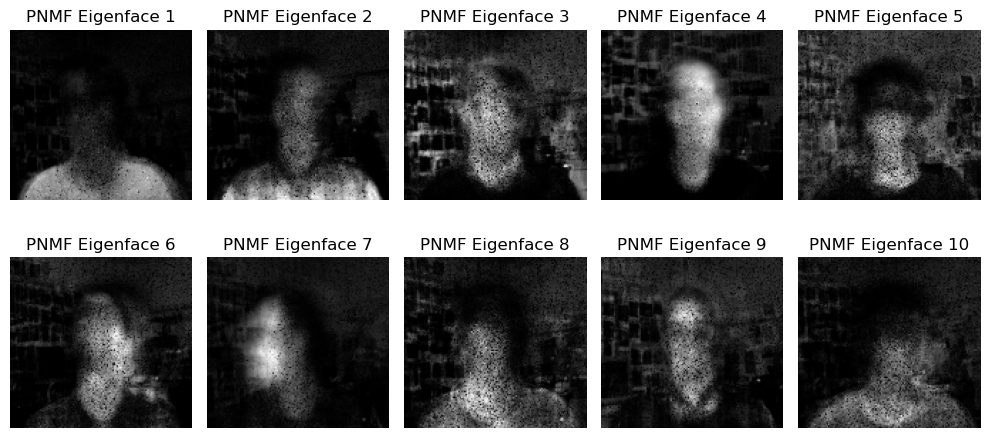

In [72]:
data = eye_X_train.numpy()

# pca = PCA(n_components=10)

# Fit the PCA model to the data
# model.fit(data)

# Get the principal components
# components = pnmf_model.basis()
components = pnmf_model.coef()
components = np.array(components)

eigenfaces = components.reshape(-1, 1, 120, 128)
# eigenfaces = components.T.reshape(-1, 120, 128)
# eigenfaces = components.reshape(10, 120, 128)

# data.reshape(10, 120, 128)

# Plot the eigenfaces
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i, 0], cmap='gray')
    ax.axis('off')
    ax.set_title(f"PNMF Eigenface {i+1}")
plt.tight_layout()
plt.show()

In [56]:
foo = pnmf_model.coef()
foo2 = pnmf_model.basis()

In [63]:
type(pca_model.components_)

numpy.ndarray

In [61]:
foo.shape

(10, 15360)

In [64]:
type(foo)

numpy.matrix

In [57]:
foo2.shape

(438, 10)

In [60]:
data_reshaped = foo.T.reshape(120, 128, 10)

ValueError: shape too large to be a matrix.

In [48]:
type(foo)

numpy.matrix

In [49]:
foo.shape

(10, 15360)

In [50]:
120*128

15360

In [88]:
a, b = transform_DR(eye_X_train, eye_X_test, "PCA", pca_model)
c, d = transform_DR(eye_X_train, eye_X_test, "PPCA", ppca_model)
e, f = transform_DR(eye_X_train, eye_X_test, "NMF", nmf_model)
g, h = transform_DR(eye_X_train, eye_X_test, "PNMF", pnmf_model)

In [89]:
a.shape

(438, 10)

In [90]:
c.shape

(438, 10)

In [91]:
e.shape

(438, 10)

In [92]:
g.shape

(438, 10)